In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score


Loading the dataset

In [ ]:
df=pd.read_csv("/content/insurance.csv")
df


Structure of dataset

In [4]:
df.shape

(1338, 7)

Missing values

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

Encoding the categorical value

In [ ]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Print the encoded DataFrame
print(df_encoded)

Linear Regression model

In [18]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #80% training, 20% testing
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Model Evaluation

In [23]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2) score
r2 = r2_score(y_test, y_pred)

#  Adjusted R-squared score
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Residual Sum of Squares (RSS)
rss = np.sum((y_test - y_pred) ** 2)

# Explained Variance Score
e_variance = explained_variance_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) score: {r2:.2f}")
print(f"Adjusted R-squared score: {adjusted_r2:.2f}")
print(f"Residual Sum of Squares (RSS): {rss:.2f}")
print(f"Explained Variance Score: {e_variance:.2f}")

Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R-squared (R2) score: 0.78
Adjusted R-squared score: 0.77
Residual Sum of Squares (RSS): 9003973448.16
Explained Variance Score: 0.78


Feature Importance

In [24]:
coef_and_features = list(zip(model.coef_, X.columns))
coef_and_features.sort(key=lambda x: abs(x[0]), reverse=True)

print("Feature Impact on Medical Insurance Costs:")
for coef, feature in coef_and_features:
    print(f"{feature}: {coef:.2f}")

Feature Impact on Medical Insurance Costs:
smoker_no: -11825.56
smoker_yes: 11825.56
region_northeast: 459.59
children: 425.28
region_southwest: -350.21
bmi: 337.09
age: 256.98
region_southeast: -198.28
region_northwest: 88.91
sex_male: -9.30
sex_female: 9.30


Visualization

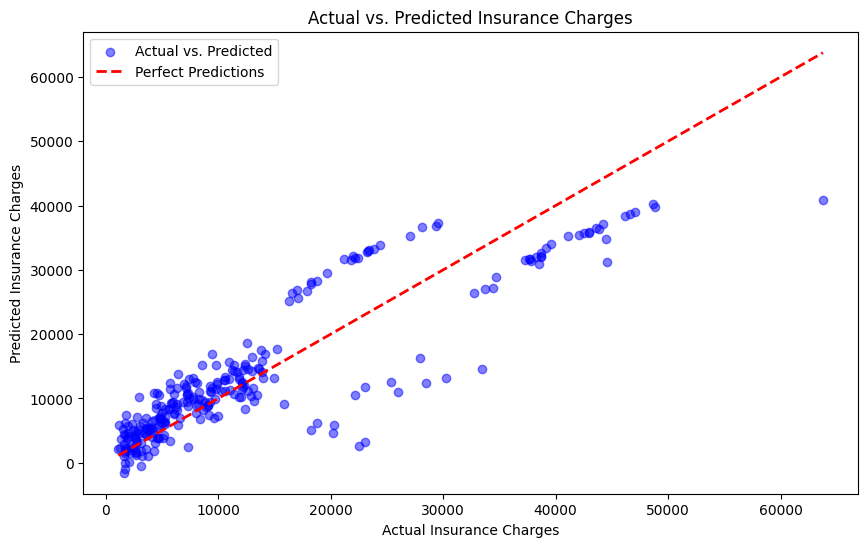

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')
plt.xlabel('Actual Insurance Charges')
plt.ylabel('Predicted Insurance Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.legend()
plt.show()

Recommendation

In [26]:
coef_and_features = list(zip(model.coef_, X.columns))
coef_and_features.sort(key=lambda x: abs(x[0]), reverse=True)

print("Top Factors Contributing to Higher Insurance Costs:")
for coef, feature in coef_and_features[:5]:
    print(f"{feature}: {coef:.2f}")

print("\nTop Factors Contributing to Lower Insurance Costs:")
for coef, feature in coef_and_features[-5:]:
    print(f"{feature}: {coef:.2f}")


Top Factors Contributing to Higher Insurance Costs:
smoker_no: -11825.56
smoker_yes: 11825.56
region_northeast: 459.59
children: 425.28
region_southwest: -350.21

Top Factors Contributing to Lower Insurance Costs:
age: 256.98
region_southeast: -198.28
region_northwest: 88.91
sex_male: -9.30
sex_female: 9.30


the coefficients indicate the direction and strength of the relationships between each feature and insurance costs. Positive coefficients suggest an increase in insurance costs, while negative coefficients suggest a decrease. For example, being a smoker (smoker_yes) has a significant positive impact on insurance costs, while being a non-smoker (smoker_no) has a significant negative impact, leading to lower costs.